<a href="https://colab.research.google.com/github/HasanMansuri/BigBasket_Sales-Analysis-Dashboard/blob/main/Bank_Loan_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANK LOAN ANALYSIS REPORT

**Import Libararies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px


In [6]:
df = pd.read_excel('financial_loan_data.xlsx')

In [7]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [8]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


 **Metadata of data**

In [9]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 38576
No of Columns: 24


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

**Data Types**

In [12]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [13]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


# Total Loan Applications

In [14]:
total_loan_applications = df['id'].count()
print('Total Loan Applications:',total_loan_applications)

Total Loan Applications: 38576


# MTD Total Loan Applications






In [15]:
latest_essue_date = df['issue_date'].max()
latest_year = latest_essue_date.year
latest_month = latest_essue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_loan_applications = mtd_data['id'].count()

print(f'MTD Total Loan Applications (for {latest_essue_date.strftime('%B %Y')}):',mtd_total_loan_applications)



MTD Total Loan Applications (for December 2021): 4314


# Total Funded Amount

In [19]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print('Total Funded Amount:${:.2f}M'. format(total_funded_amount_millions))

Total Funded Amount:$435.76M


# Month-To-Date Funded Amount

In [20]:
latest_essue_date = df['issue_date'].max()
latest_year = latest_essue_date.year
latest_month = latest_essue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print('MTD Total Funded Amount ({}):${:.2f}M'.format(latest_essue_date.strftime('%B %Y'),mtd_total_funded_amount_millions))

MTD Total Funded Amount (December 2021):$53.98M


# Total Amount Received

In [21]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received/1000000
print('Total Amount Received :${:.2f}M'. format(total_amount_received_millions))

Total Amount Received :$473.07M


#  Month-to-Date Total Amount Received

In [22]:
latest_essue_date = df['issue_date'].max()
latest_year = latest_essue_date.year
latest_month = latest_essue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print('MTD Total Amount Received ({}):${:.2f}M'.format(latest_essue_date.strftime('%B %Y'),mtd_total_amount_received_millions))

MTD Total Amount Received (December 2021):$58.07M


#  Average Interest Rate

In [24]:
average_interest_rate = df['int_rate'].mean()*100
print('Average Interest Rate:{:.2f}%'.format(average_interest_rate))

Average Interest Rate:12.05%


#  Average Debt-to-Income Ratio (DTI)

In [25]:
average_dti = df['dti'].mean()*100
print('Average DTI:{:.2f}%'.format(average_dti))

Average DTI:13.33%


#  Good Loan Metrics

In [27]:
# Filter good loans
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

# Total loan applications
total_loan_applications = df['id'].count()

# Good loan applications
good_loan_applications = good_loans['id'].count()

# Total funded amount for good loans
good_loan_funded_amount = good_loans['loan_amount'].sum()

# Total received amount for good loans
good_loan_received = good_loans['total_payment'].sum()

# Convert amounts into millions
good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

# Calculate percentage of good loans
good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

# Print results
print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))


Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


#  Bad Loan Metrics

In [28]:
# Filter Bad loans
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

# Total loan applications
total_loan_applications = df['id'].count()

# Bad loan applications
bad_loan_applications = bad_loans['id'].count()

# Total funded amount for Bad loans
bad_loan_funded_amount = bad_loans['loan_amount'].sum()

# Total received amount for Bad loans
bad_loan_received = bad_loans['total_payment'].sum()

# Convert amounts into millions
bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

# Calculate percentage of Bad loans
bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

# Print results
print("bad Loan Applications:", bad_loan_applications)
print("bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of bad Loan Applications: {:.2f}%".format(bad_loan_percentage))


bad Loan Applications: 5333
bad Loan Funded Amount (in Millions): $65.53M
bad Loan Total Received (in Millions): $37.28M
Percentage of bad Loan Applications: 13.82%


#  Monthly Trends By Issue Date for Total Funded Amount

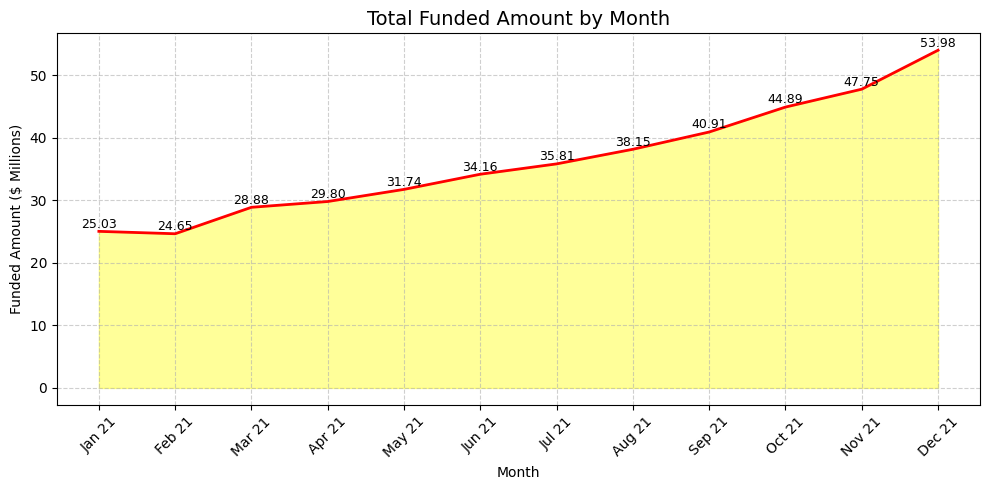

In [30]:
# Calculate total funded loan amount per month
monthly_funded = (
    df.sort_values('issue_date')  # Sort data by issue date
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))  # Extract month & year name
    .groupby('month_name', sort=False)['loan_amount']  # Group by month name
    .sum()  # Sum up total loan amount per month
    .div(1_000_000)  # Convert to millions
    .reset_index(name='loan_amount_millions')  # Reset index and rename column
)

# Set up figure size
plt.figure(figsize=(10, 5))

# Fill area under the curve
plt.fill_between(
    monthly_funded['month_name'],
    monthly_funded['loan_amount_millions'],
    color='yellow',
    alpha=0.4
)

# Plot the line graph
plt.plot(
    monthly_funded['month_name'],
    monthly_funded['loan_amount_millions'],
    color='red',
    linewidth=2
)

# Add data labels for each point
for i, row in monthly_funded.iterrows():
    plt.text(
        i,
        row['loan_amount_millions'] + 0.1,
        f"{row['loan_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

# Add chart title and labels
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')

# Rotate month names and format x-axis ticks
plt.xticks(
    ticks=range(len(monthly_funded)),
    labels=monthly_funded['month_name'],
    rotation=45
)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


#  Monthly Trends By Issue Date for Total Amount Received

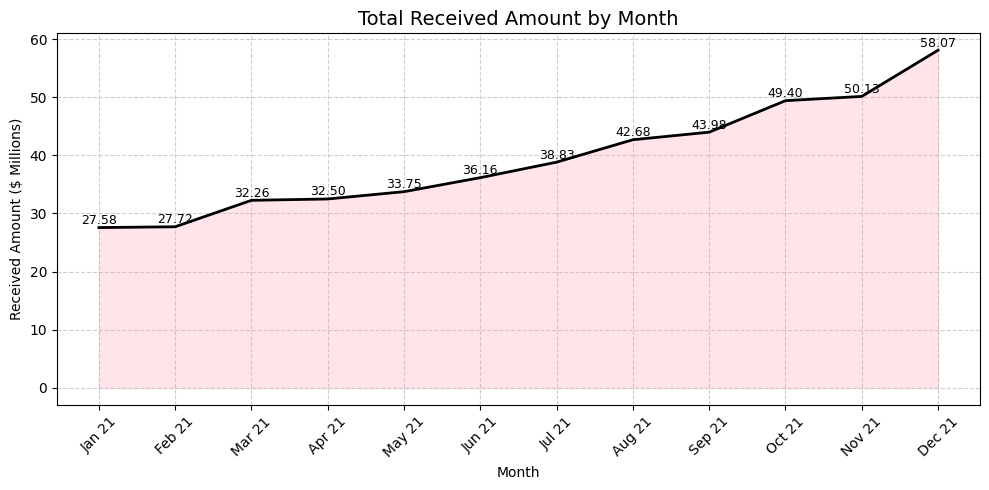

In [33]:
# Calculate total Received amount per month
monthly_received = (
    df.sort_values('issue_date')  # Sort data by issue date
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))  # Extract month & year name
    .groupby('month_name', sort=False)['total_payment']  # Group by month name
    .sum()  # Sum up total received amount per month
    .div(1_000_000)  # Convert to millions
    .reset_index(name='received_amount_millions')  # Reset index and rename column
)

# Set up figure size
plt.figure(figsize=(10, 5))

# Fill area under the curve
plt.fill_between(
    monthly_received['month_name'],
    monthly_received['received_amount_millions'],
    color='pink',
    alpha=0.4
)

# Plot the line graph
plt.plot(
    monthly_received['month_name'],
    monthly_received['received_amount_millions'],
    color='black',
    linewidth=2
)

# Add data labels for each point
for i, row in monthly_received.iterrows():
    plt.text(
        i,
        row['received_amount_millions'] + 0.1,
        f"{row['received_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

# Add chart title and labels
plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')

# Rotate month names and format x-axis ticks
plt.xticks(
    ticks=range(len(monthly_received)),
    labels=monthly_received['month_name'],
    rotation=45
)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#  Monthly Trends By Issue Date for Total Loan Applications

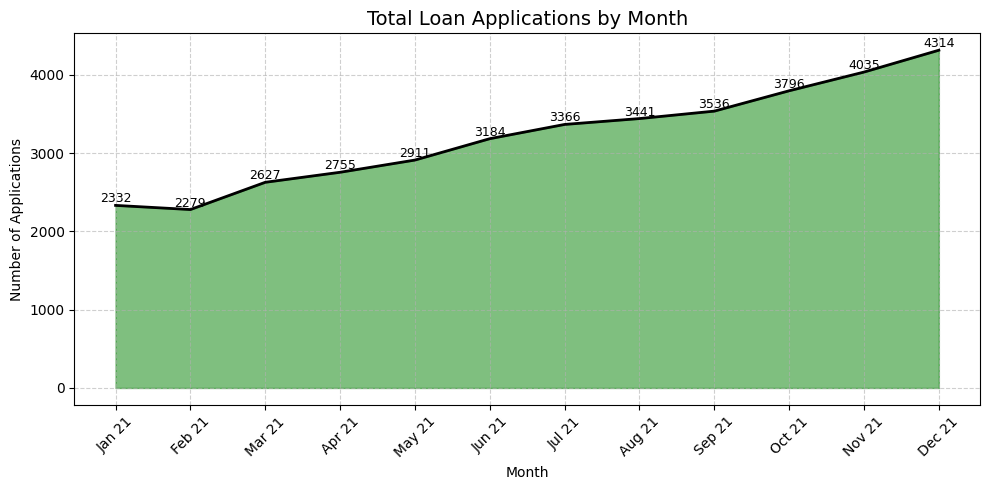

In [34]:
# Calculate total loan applications per month
monthly_applications = (
    df.sort_values('issue_date')  # Sort data by issue date
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))  # Extract month and year
    .groupby('month_name', sort=False)['id']  # Group by month name
    .count()  # Count the number of applications
    .reset_index(name='loan_applications_count')  # Reset index and rename column
)

# Set up figure size
plt.figure(figsize=(10, 5))

# Fill area under the curve
plt.fill_between(
    monthly_applications['month_name'],
    monthly_applications['loan_applications_count'],
    color='green',
    alpha=0.5
)

# Plot the line graph
plt.plot(
    monthly_applications['month_name'],
    monthly_applications['loan_applications_count'],
    color='black',
    linewidth=2
)

# Add data labels for each point
for i, row in monthly_applications.iterrows():
    plt.text(
        i,
        row['loan_applications_count'] + 0.5,
        f"{row['loan_applications_count']}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

# Add chart title and axis labels
plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')

# Rotate month names and format x-axis ticks
plt.xticks(
    ticks=range(len(monthly_applications)),
    labels=monthly_applications['month_name'],
    rotation=45
)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


#  Regional Analysis By State for Total Funded Amount

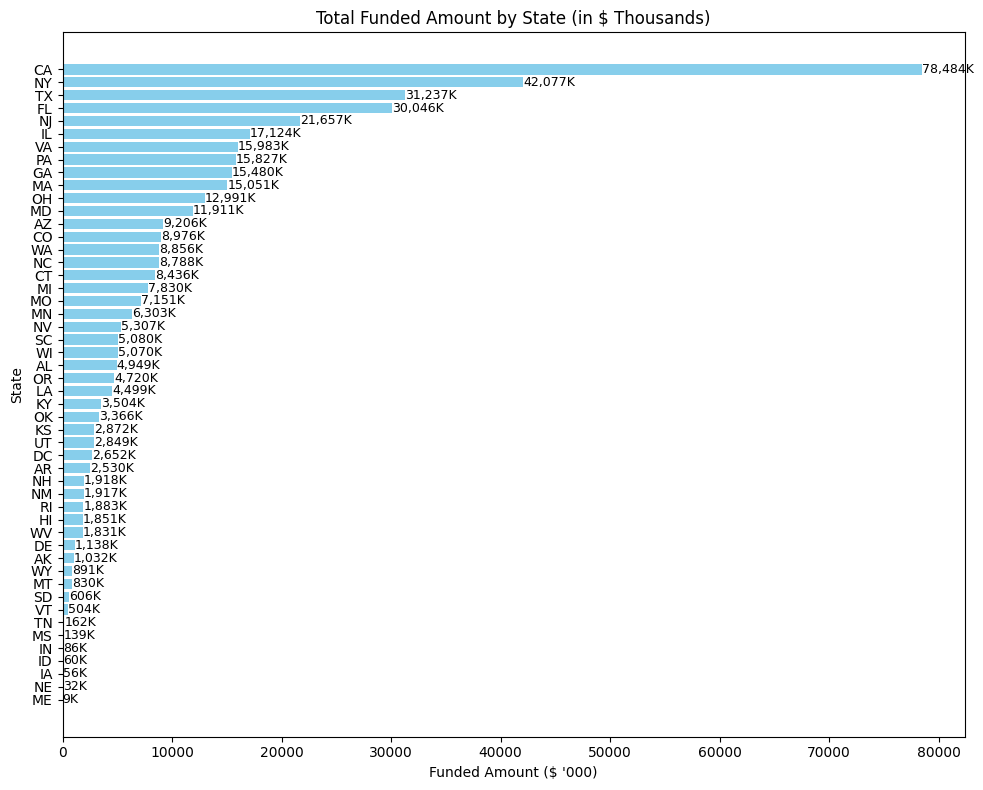

In [35]:
# Calculate total funded amount by state
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)

# Convert funded amount to thousands
state_funding_thousands = state_funding / 1000

# Set up figure size
plt.figure(figsize=(10, 8))

# Create horizontal bar chart
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='skyblue')

# Add data labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10,  # Position label slightly outside the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the text
        f'{width:,.0f}K',  # Format value in thousands
        va='center',
        fontsize=9
    )

# Add chart title and axis labels
plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('Funded Amount ($ \'000)')
plt.ylabel('State')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the chart
plt.show()


#  Regional Analysis By State for Total Received Amount

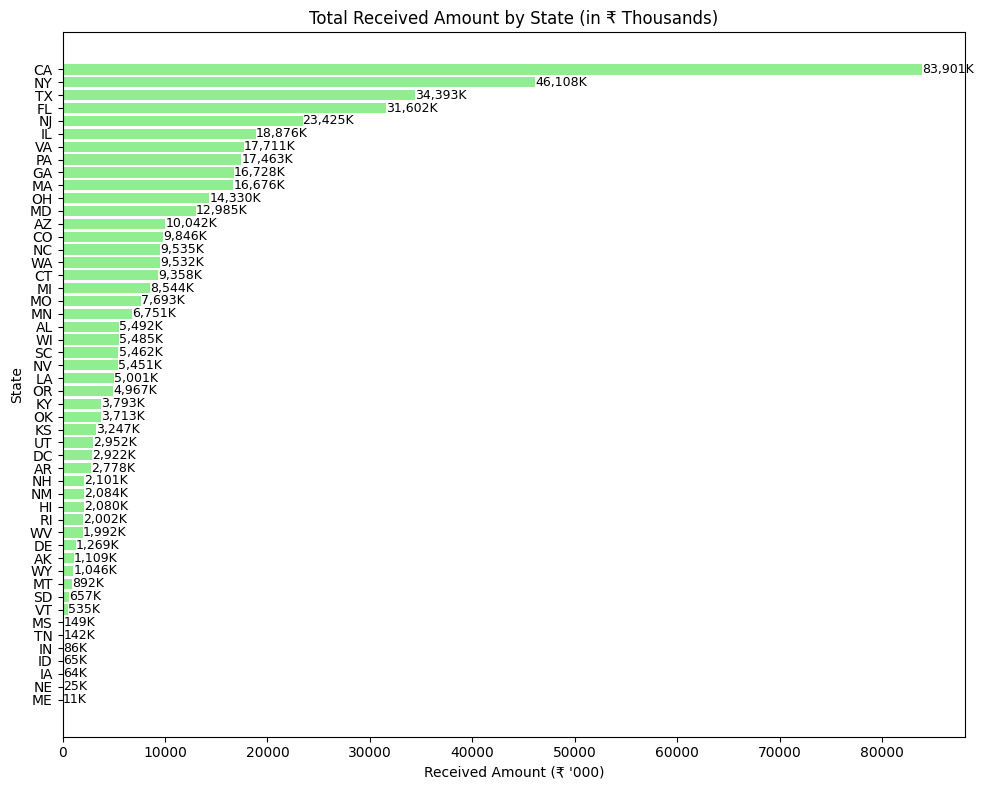

In [36]:
# Calculate total received amount by state
state_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)

# Convert received amount to thousands
state_received_thousands = state_received / 1000

# Set up figure size
plt.figure(figsize=(10, 8))

# Create horizontal bar chart
bars = plt.barh(state_received_thousands.index, state_received_thousands.values, color='lightgreen')

# Add data labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10,  # Position label slightly outside the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the text
        f'{width:,.0f}K',  # Format value in thousands
        va='center',
        fontsize=9
    )

# Add chart title and axis labels
plt.title('Total Received Amount by State (in ₹ Thousands)')
plt.xlabel('Received Amount (₹ \'000)')
plt.ylabel('State')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the chart
plt.show()


#  Regional Analysis By State for Total Loan Applications

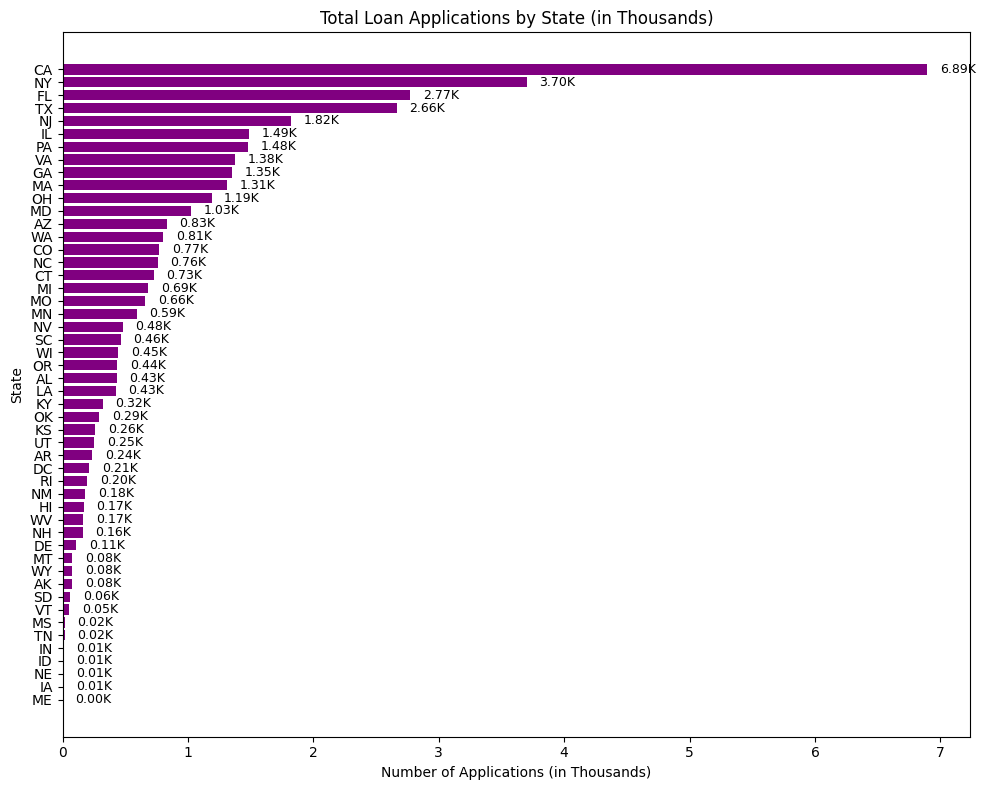

In [38]:
# Calculate total loan applications by state
state_applications = df.groupby('address_state')['id'].count().sort_values(ascending=True)

# Convert application counts to thousands (optional, just for consistency)
state_applications_thousands = state_applications / 1000

# Set up figure size
plt.figure(figsize=(10, 8))

# Create horizontal bar chart
bars = plt.barh(state_applications_thousands.index, state_applications_thousands.values, color='purple')

# Add data labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.1,  # Slightly outside each bar
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.2f}K',  # Show value in thousands with 2 decimals
        va='center',
        fontsize=9
    )

# Add chart title and axis labels
plt.title('Total Loan Applications by State (in Thousands)')
plt.xlabel('Number of Applications (in Thousands)')
plt.ylabel('State')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the chart
plt.show()


#  Loan Term Analysis By Total Funded Amount

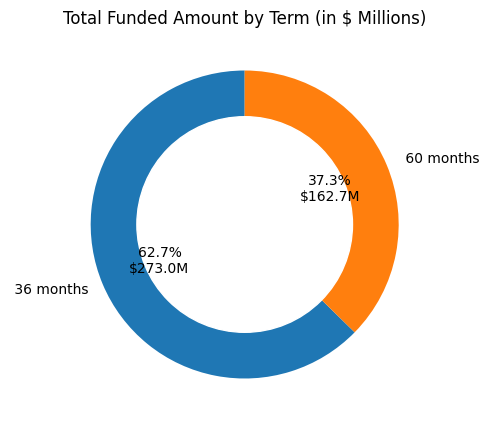

In [39]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${(p * sum(term_funding_millions) / 100):.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

#  Loan Term Analysis By Total Received Amount

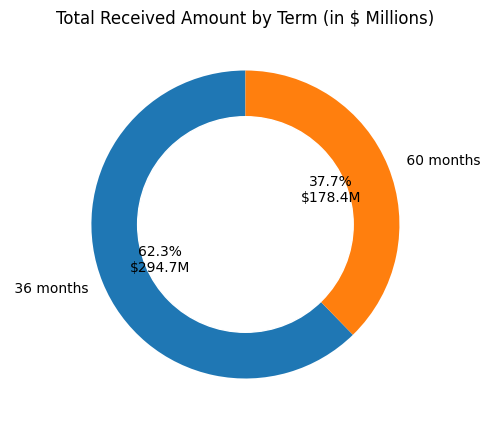

In [41]:
# Calculate total received amount by term
term_received_millions = df.groupby('term')['total_payment'].sum() / 1000000

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    term_received_millions,
    labels=term_received_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${(p * sum(term_received_millions) / 100):.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

# Add white circle in the center (donut style)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

# Add chart title
plt.title("Total Received Amount by Term (in $ Millions)")

# Show chart
plt.show()


#  Loan Term Analysis By Total Loan Applications

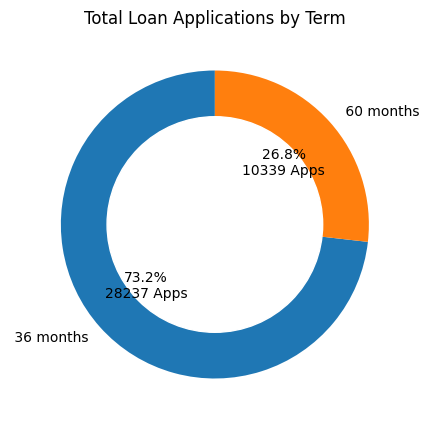

In [42]:
# Calculate total loan applications by term
term_applications = df.groupby('term')['id'].count()

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    term_applications,
    labels=term_applications.index,
    autopct=lambda p: f"{p:.1f}%\n{(p * sum(term_applications) / 100):.0f} Apps",
    startangle=90,
    wedgeprops={'width': 0.4}
)

# Add white circle in the center (donut style)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

# Add chart title
plt.title("Total Loan Applications by Term")

# Show chart
plt.show()


# Employee Length By Total Funded Amount

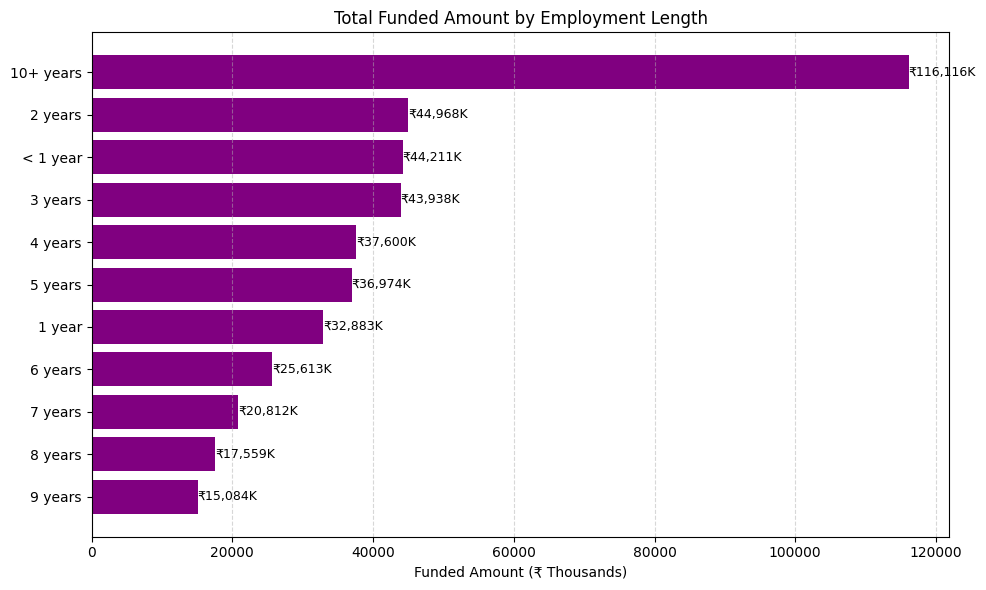

In [43]:
# Calculate total funded amount by employment length
# Group the data by 'emp_length', sum the 'loan_amount', sort values, and convert to thousands
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

# Set up the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart for funded amount by employment length
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')

# Add data labels (₹ value) at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5,  # Position label slightly outside each bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the label
        f"₹{width:,.0f}K",  # Format numbers with comma and show in thousands
        va='center',
        fontsize=9
    )

# Add x-axis label and chart title
plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout to avoid label cutoff
plt.tight_layout()

# Display the chart
plt.show()


# Total Received Amount by Employment Length

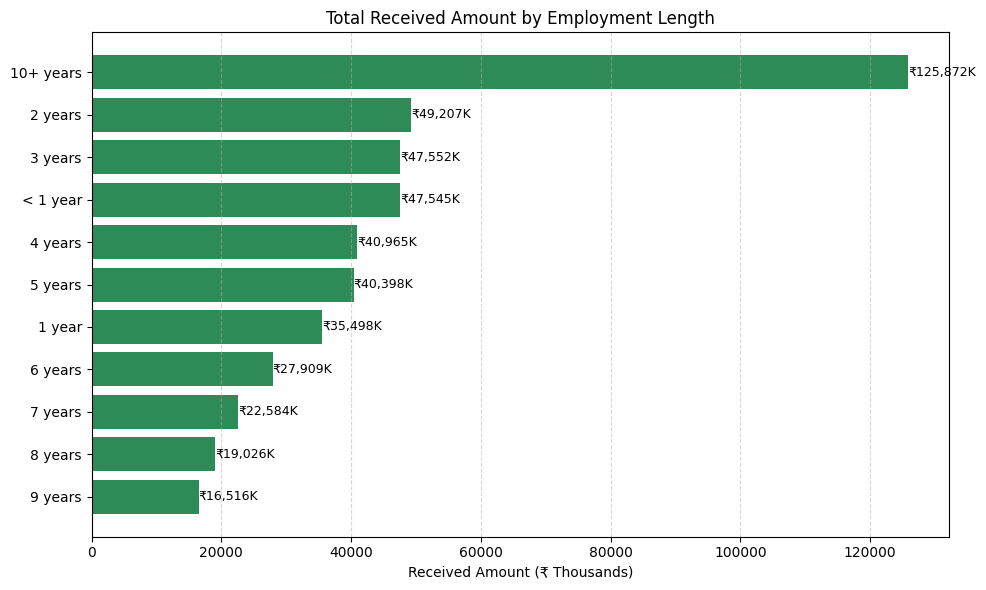

In [44]:
# Calculate total received amount by employment length
# Group the data by 'emp_length', sum the 'total_payment', sort values, and convert to thousands
emp_received_thousands = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000

# Set up figure size
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
bars = plt.barh(emp_received_thousands.index, emp_received_thousands, color='seagreen')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5,
        bar.get_y() + bar.get_height() / 2,
        f"₹{width:,.0f}K",
        va='center',
        fontsize=9
    )

# Add labels and title
plt.xlabel("Received Amount (₹ Thousands)")
plt.title("Total Received Amount by Employment Length")

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()


# Total Loan Applications by Employment Length

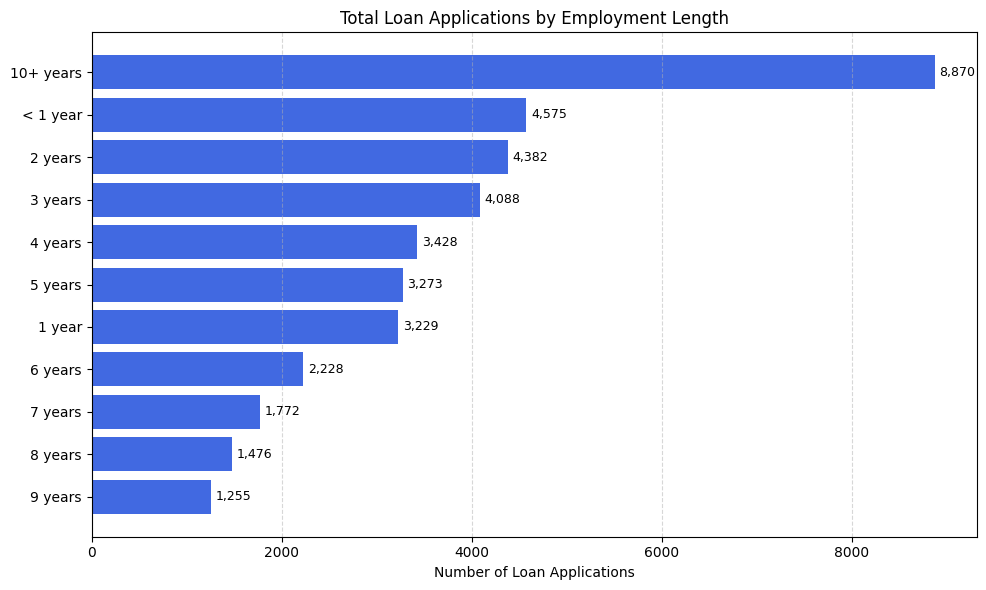

In [45]:
# Calculate total loan applications by employment length
# Group the data by 'emp_length' and count the number of applications
emp_applications = df.groupby('emp_length')['id'].count().sort_values()

# Set up figure size
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
bars = plt.barh(emp_applications.index, emp_applications, color='royalblue')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 50,
        bar.get_y() + bar.get_height() / 2,
        f"{width:,}",
        va='center',
        fontsize=9
    )

# Add labels and title
plt.xlabel("Number of Loan Applications")
plt.title("Total Loan Applications by Employment Length")

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()


# Loan Purpose By Total Funded Amount

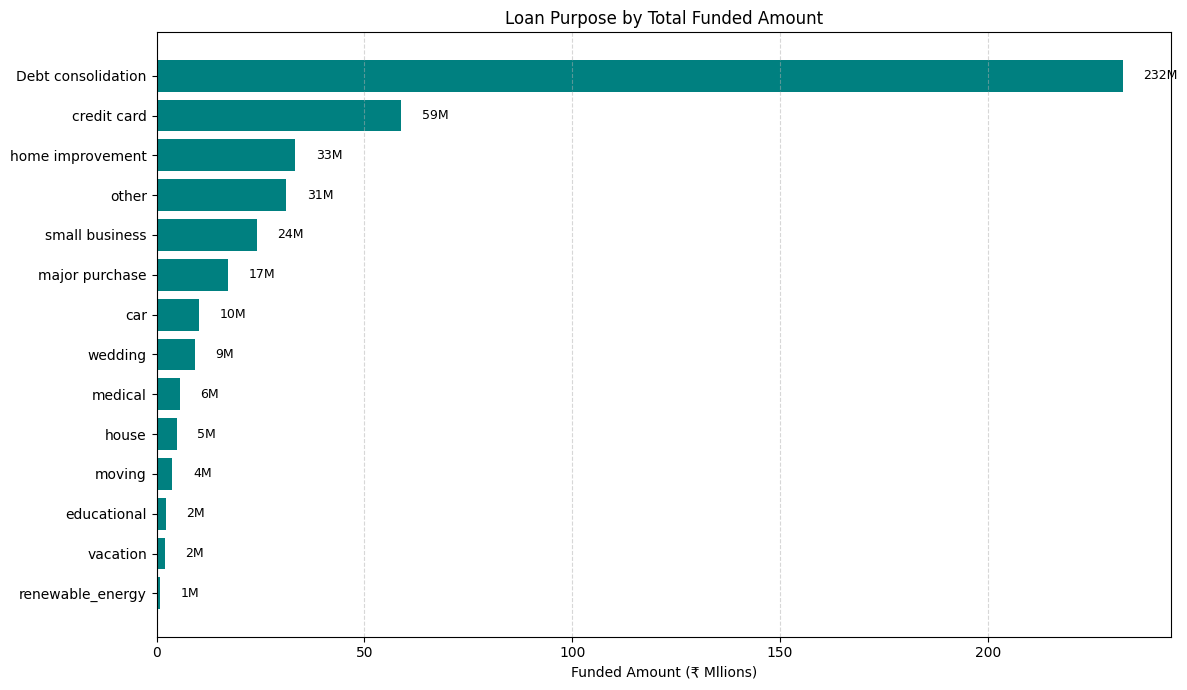

In [48]:
# Calculate total funded amount by loan purpose
# Group by 'purpose', sum the 'loan_amount', sort values, and convert to millions
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000

# Set up figure size
plt.figure(figsize=(12, 7))

# Create horizontal bar chart
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='teal')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5,  # Slightly outside each bar
        bar.get_y() + bar.get_height() / 2,  # Vertically centered
        f"{width:,.0f}M",  # Format in Millions with commas
        va='center',
        fontsize=9
    )

# Add axis labels and chart title
plt.xlabel("Funded Amount (₹ Mllions)")
plt.title("Loan Purpose by Total Funded Amount")

# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()


# Loan Purpose by Total Received Amount

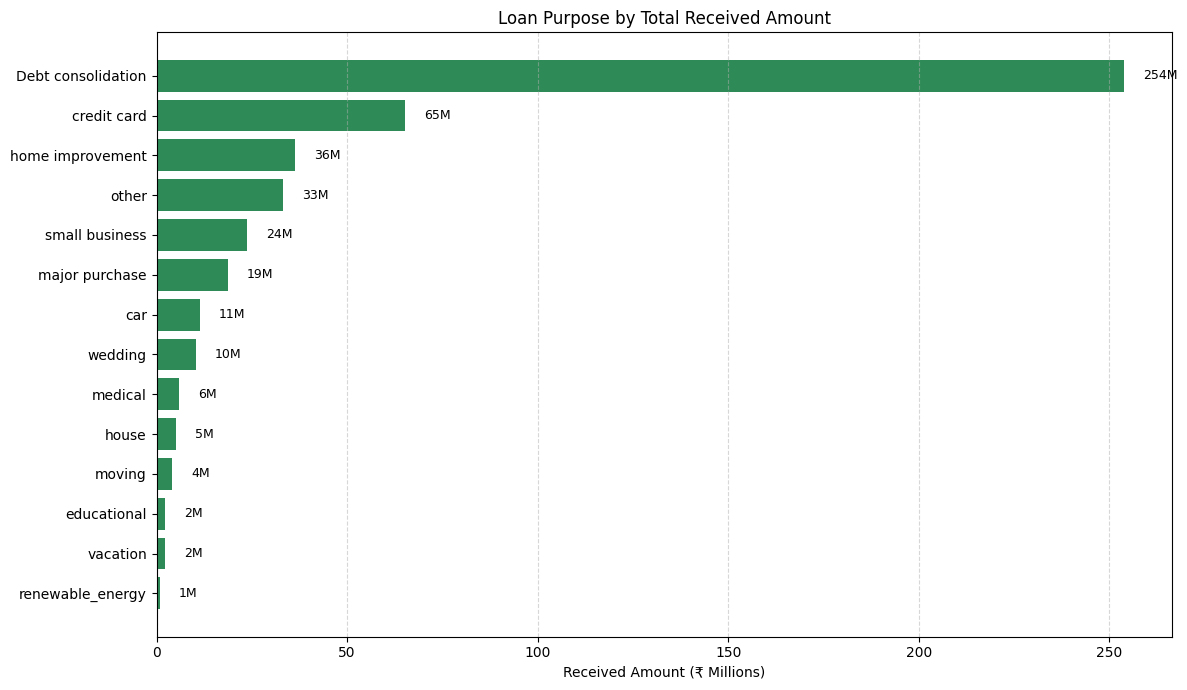

In [49]:
# Calculate total received amount by loan purpose
# Group by 'purpose', sum the 'total_payment', sort values, and convert to millions
purpose_received_millions = df.groupby('purpose')['total_payment'].sum().sort_values() / 1000000

# Set up figure size
plt.figure(figsize=(12, 7))

# Create horizontal bar chart
bars = plt.barh(purpose_received_millions.index, purpose_received_millions.values, color='seagreen')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5,  # Slightly outside each bar
        bar.get_y() + bar.get_height() / 2,  # Vertically centered
        f"{width:,.0f}M",  # Format in millions with commas
        va='center',
        fontsize=9
    )

# Add axis labels and chart title
plt.xlabel("Received Amount (₹ Millions)")
plt.title("Loan Purpose by Total Received Amount")

# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()


# Loan Purpose by Total Loan Applications

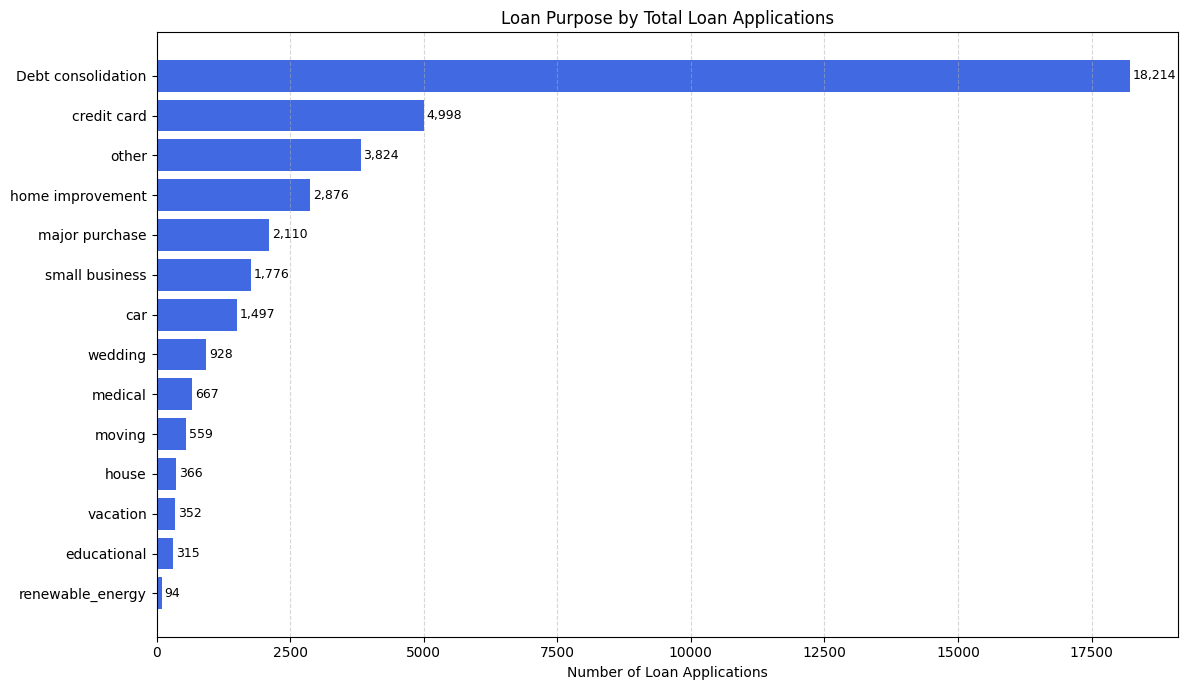

In [50]:
# Calculate total loan applications by loan purpose
# Group by 'purpose' and count number of applications
purpose_applications = df.groupby('purpose')['id'].count().sort_values()

# Set up figure size
plt.figure(figsize=(12, 7))

# Create horizontal bar chart
bars = plt.barh(purpose_applications.index, purpose_applications.values, color='royalblue')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 50,  # Slightly outside each bar
        bar.get_y() + bar.get_height() / 2,  # Vertically centered
        f"{width:,}",  # Format with commas
        va='center',
        fontsize=9
    )

# Add axis labels and chart title
plt.xlabel("Number of Loan Applications")
plt.title("Loan Purpose by Total Loan Applications")

# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()


# Home Owernship By Total Funded Amount

In [55]:
# Calculate total funded amount by home ownership
# Group the dataset by 'home_ownership' and sum the 'loan_amount'
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()

# Convert loan amount into millions for better readability
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

# Create a treemap visualization using Plotly Express
fig = px.treemap(
    home_funding,
    path=['home_ownership'],                 # Hierarchical category (home ownership types)
    values='loan_amount_millions',           # Size of each block based on funded amount
    color='loan_amount_millions',            # Color intensity based on funded amount
    color_continuous_scale='Blues',          # Blue color gradient for better visual appeal
    title='Total Funded Amount by Home Ownership (₹ Millions)'  # Chart title
)

# Display the interactive treemap
fig.show()


# Total Received Amount by Home Ownership

In [56]:
# Calculate total received amount by home ownership
# Group the dataset by 'home_ownership' and sum the 'total_payment'
home_received = df.groupby('home_ownership')['total_payment'].sum().reset_index()

# Convert total received amount into millions for readability
home_received['total_payment_millions'] = home_received['total_payment'] / 1000000

# Create a treemap visualization using Plotly Express
fig = px.treemap(
    home_received,
    path=['home_ownership'],                   # Hierarchical category (home ownership types)
    values='total_payment_millions',           # Size of each block based on received amount
    color='total_payment_millions',            # Color intensity based on received amount
    color_continuous_scale='Greens',           # Green color gradient for clarity
    title='Total Received Amount by Home Ownership (₹ Millions)'  # Chart title
)

# Display the interactive treemap
fig.show()


# Total Loan Applications by Home Ownership

In [57]:
# Calculate total loan applications by home ownership
# Group the dataset by 'home_ownership' and count the number of applications
home_applications = df.groupby('home_ownership')['id'].count().reset_index()

# Rename the count column for clarity
home_applications.rename(columns={'id': 'loan_applications'}, inplace=True)

# Create a treemap visualization using Plotly Express
fig = px.treemap(
    home_applications,
    path=['home_ownership'],                   # Hierarchical category (home ownership types)
    values='loan_applications',                # Size of each block based on number of applications
    color='loan_applications',                 # Color intensity based on application count
    color_continuous_scale='Purples',          # Purple color gradient for visual variety
    title='Total Loan Applications by Home Ownership'  # Chart title
)

# Display the interactive treemap
fig.show()
